In [6]:
v_x = 5
v_y = 2
v_x_unit = (v_x/((v_x*v_x + v_y*v_y)**(1/2)))
v_y_unit = (v_y/((v_x*v_x + v_y*v_y)**(1/2)))
v_y_unit


0.3713906763541037

In [23]:
def convert_normal(v_x,v_y):
    v_x_unit = (v_x/((v_x*v_x + v_y*v_y)**(1/2)))
    v_y_unit = (v_y/((v_x*v_x + v_y*v_y)**(1/2)))
    return v_x_unit, v_y_unit
    

In [37]:
x,y = convert_normal(5,10)
print(x,y)

0.4472135954999579 0.8944271909999159


In [42]:
import math
h = 16
l = 10
num = 4
theta =360/num

x_end = 0
y_end = 0
u_x_r =0
u_y_r = 1
a =[h,l,h,l]
table = []
table_x = []
table_y = []
for i in range(num):
    x_start = x_end
    y_start = y_end
    u_x = u_x_r
    u_y = u_y_r
    x_end = x_start + (a[i] * (u_x))
    y_end = y_start + (a[i] * (u_y))
    
    u_x_r = (u_x * (math.cos(math.radians(theta)))) + ( u_y * (math.sin(math.radians(theta))))
    u_y_r = (-1 * u_x * (math.sin(math.radians(theta)))) +  (u_y * (math.cos(math.radians(theta)))) 
#     print(theta)
    table.append([int(x_start),int(y_start),int(x_end),int(y_end),u_x,u_y])
    table_x.append(x_start)
    table_y.append(y_start)
    table_x.append(x_end)
    table_y.append(y_end)


table
# table_y    

[[0, 0, 0, 16, 0, 1],
 [0, 16, 10, 16, 1.0, 6.123233995736766e-17],
 [10, 16, 10, 0, 1.2246467991473532e-16, -1.0],
 [10, 0, 0, 0, -1.0, -1.8369701987210297e-16]]

In [175]:
def draw_table(h,l,num):
    theta =360/num

    x_end = 0
    y_end = 0
    u_x_r =0
    u_y_r = 1
    a =[h,l,h,l,l]
    table = []
    table_x = []
    table_y = []
    for i in range(num):
        x_start = x_end
        y_start = y_end
        u_x = u_x_r
        u_y = u_y_r
        x_end = x_start + (a[i] * (u_x))
        y_end = y_start + (a[i] * (u_y))

        u_x_r = (u_x * (math.cos(math.radians(theta)))) + ( u_y * (math.sin(math.radians(theta))))
        u_y_r = (-1 * u_x * (math.sin(math.radians(theta)))) +  (u_y * (math.cos(math.radians(theta)))) 
    #     print(theta)
        table.append([int(x_start),int(y_start),int(x_end),int(y_end),u_x,u_y])
        table_x.append(x_start)
        table_y.append(y_start)
        table_x.append(x_end)
        table_y.append(y_end)
    return table, table_x, table_y

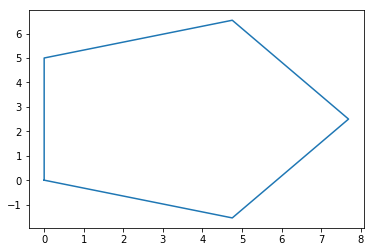

In [177]:
table, table_x, table_y = draw_table(5,5,5)
table
plt.plot(table_x, table_y)
plt.show()

In [173]:
import numpy as np
state_list = []
col_state = []
x_start = 1
y_start = 2
v = np.array([0.3713906763541037,0.9284766908852594])
hit_list = []
col_state = []
state_list.append(np.array([x_start,y_start,0,0,0]))
col_state.append([x_start, y_start,v[0],v[1]])
for j in range(45):
    hit_list = []
    for i in table:
    #         print(v)
        wall_eq = []
        vect = []
        if(i[2] - i[0] == 0):
            s = i[0]
            wall_eq.append([1,0,0],)
            wall_eq.append([1,0,-v[0]])
            wall_eq.append([0,1,-v[1]])
            vect.append(s)
            vect.append(x_start)
            vect.append(y_start)
        #         print(np.linalg.inv(np.array(wall_eq)))
            hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
           
            if(hit[2] < 0 or hit[2] == 0):
                pass
            else:
                hit_list.append(np.append(hit,np.array([i[-2],i[-1]])))
        else:
            m = (i[3] - i [1])/(i[2] - i [0])
            x = i[0] 
            y = i[1]
            b= y - m*x
        #         print(b)
            wall_eq.append([-m,1,0])
            wall_eq.append([1,0,-v[0]])
            wall_eq.append([0,1,-v[1]])
            vect.append(b)
            vect.append(x_start)
            vect.append(y_start)
            hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
        #         print(hit)
            if(hit[2] < 0 or hit[2] == 0):
                pass
            else:
                hit_list.append(np.append(hit,np.array([i[-2],i[-1]])))
    hit_array = np.array(hit_list)
#     print(hit_array)
    state = hit_array[np.argmin(hit_array[:,2]),:]
    #     print(state)
#     state_list.append(state)
    wall_dir = state[-2:]
    angle = np.pi/2
    x_stop = state[0]
    y_stop = state[1]
    x_start = x_stop
    y_start = y_stop
    rotat_mat = np.array([np.cos(angle), np.sin(angle), -1 * np.sin(angle), np.cos(angle)]).reshape(2,2)
    norm_wall = np.matmul(rotat_mat,wall_dir)
    nx,ny = convert_normal(norm_wall[0],norm_wall[1])
    normalized = np.array([nx,ny])
    v_reflect = v - (2 * np.dot(v ,normalized) * normalized)
    v = v_reflect
    col_state.append([state[0],state[1],v[0],v[1]])
    print(col_state)

NameError: name 'table' is not defined

In [335]:
def sim(h,l,num,x_s,y_s,v_x,v_y,col):
    import numpy as np
    
    table, table_x, table_y = draw_table(h,l,num)
    wall_dist = cal_dist(table)
    x,y = convert_normal(v_x,v_y)
    dist_list = []
    state_list = []
    col_state = []
    x_start = x_s
    y_start = y_s
    v = np.array([x,y])
    hit_list = []
    phi_list = []
    state_list.append(np.array([x_start,y_start,0,0,0,0,0,0]))
    col_state.append([x_start, y_start,v[0],v[1]])
    for j in range(col):
        wall = 0
        hit_list = []
        for i in table:
        #         print(v)
            wall_eq = []
            vect = []
            if(i[2] - i[0] == 0):
                s = i[0]
                wall_eq.append([1,0,0],)
                wall_eq.append([1,0,-v[0]])
                wall_eq.append([0,1,-v[1]])
                vect.append(s)
                vect.append(x_start)
                vect.append(y_start)
            #         print(np.linalg.inv(np.array(wall_eq)))
                try:
                    
                    hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
                    
                except Exception:
                    wall = wall + 1
                    continue
                if(hit[2] < 0 or hit[2] == 0):
                    wall = wall + 1
                    pass
                else:
                    
                    hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                    wall = wall + 1
                
            else:
                m = (i[3] - i [1])/(i[2] - i [0])
                x = i[0] 
                y = i[1]
                b= y - m*x
            #         print(b)
                wall_eq.append([-m,1,0])
                wall_eq.append([1,0,-v[0]])
                wall_eq.append([0,1,-v[1]])
                vect.append(b)
                vect.append(x_start)
                vect.append(y_start)
                try:
                    hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
            #         print(hit)
                except Exception:
                    wall = wall + 1
                    continue
                if(hit[2] < 0 or hit[2] == 0):
                    wall = wall + 1
                    pass
                else:
                    
                    hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                    wall = wall + 1
                    
#             print(wall)
        hit_array = np.array(hit_list)
    #     print(hit_array)
        state = hit_array[np.argmin(hit_array[:,2]),:]
        #     print(state)
        state_list.append(state)
        wall_dir = state[-2:]
        angle = -np.pi/2
        x_stop = state[0]
        y_stop = state[1]
        x_start = x_stop
        y_start = y_stop
        rotat_mat = np.array([np.cos(angle), -np.sin(angle), np.sin(angle), np.cos(angle)]).reshape(2,2)
        norm_wall = np.matmul(rotat_mat,wall_dir)
        v_reflect = v - (2 * np.dot(v ,norm_wall) * norm_wall)
        v = v_reflect
        phi = np.arccos(np.dot(v_reflect,norm_wall))
        col_state.append([state[0],state[1],state[3],v[0],v[1]])
        phi_list.append(np.sin(phi))
        wall_hit = int(state[3])
        some_wall_sum = sum(wall_dist[:wall_hit])
        wall_hit_dist = wall_dist[wall_hit] - (wall_dist[wall_hit] - \
                                               math.sqrt((state[-4] - state[0])**2 + (state[-3] - state[1])**2))
        total_dist = some_wall_sum + wall_hit_dist
        dist_list.append(total_dist)
    plt.plot(table_x, table_y)
    plt.plot(np.array(state_list)[:,0],np.array(state_list)[:,1])
#     plt.savefig('rect_irrationa_v.png')
    plt.show()
    plt.scatter(dist_list,phi_list)
    plt.show()

    
    # print(state_list)
    return col_state,phi_list,dist_list
    

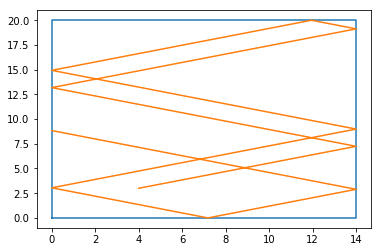

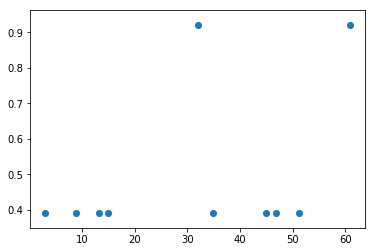

In [336]:
import math
import matplotlib.pyplot as plt
import numpy as np

result, phi_square, dist_square = sim(20,14,4,4,3,3 * np.pi,4,10) 
# dist_square

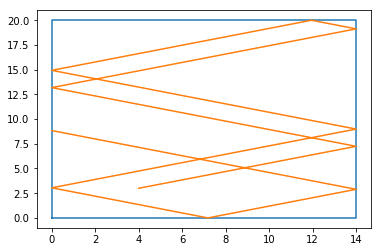

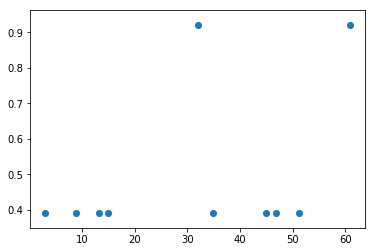

In [334]:
result, phi_square, dist_square = sim_rot(20,14,4,4,3,3 * np.pi,4,10) 

In [330]:
def sim_rot(h,l,num,x_s,y_s,v_x,v_y,col):
    import numpy as np
    
    table, table_x, table_y = draw_table(h,l,num)
    wall_dist = cal_dist(table)
    x,y = convert_normal(v_x,v_y)
    dist_list = []
    state_list = []
    col_state = []
    x_start = x_s
    y_start = y_s
    v = np.array([x,y])
    hit_list = []
    phi_list = []
    state_list.append(np.array([x_start,y_start,0,0,0,0,0,0]))
    col_state.append([x_start, y_start,v[0],v[1]])
    for j in range(col):
        wall = 0
        hit_list = []
        for i in table:
        #         print(v)
            wall_eq = []
            vect = []
            if(i[2] - i[0] == 0):
                s = i[0]
                wall_eq.append([1,0,0],)
                wall_eq.append([1,0,-v[0]])
                wall_eq.append([0,1,-v[1]])
                vect.append(s)
                vect.append(x_start)
                vect.append(y_start)
            #         print(np.linalg.inv(np.array(wall_eq)))
                try:
                    
                    hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
                    
                except Exception:
                    wall = wall + 1
                    continue
                if(hit[2] < 0 or hit[2] == 0):
                    wall = wall + 1
                    pass
                else:
                    
                    hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                    wall = wall + 1
                
            else:
                m = (i[3] - i [1])/(i[2] - i [0])
                x = i[0] 
                y = i[1]
                b= y - m*x
            #         print(b)
                wall_eq.append([-m,1,0])
                wall_eq.append([1,0,-v[0]])
                wall_eq.append([0,1,-v[1]])
                vect.append(b)
                vect.append(x_start)
                vect.append(y_start)
                try:
                    hit = np.matmul(np.linalg.inv(np.array(wall_eq)),np.array(vect))
            #         print(hit)
                except Exception:
                    wall = wall + 1
                    continue
                if(hit[2] < 0 or hit[2] == 0):
                    wall = wall + 1
                    pass
                else:
                    
                    hit_list.append(np.append(hit,np.array([wall,i[0],i[1],i[-2],i[-1]])))
                    wall = wall + 1
                    
#             print(wall)
        hit_array = np.array(hit_list)
    #     print(hit_array)
        state = hit_array[np.argmin(hit_array[:,2]),:]
        #     print(state)
        state_list.append(state)
        wall_dir = state[-2:]
        angle = -np.pi/2
        x_stop = state[0]
        y_stop = state[1]
        x_start = x_stop
        y_start = y_stop
        
        rotat_mat_outward = np.array([np.cos(-angle), -np.sin(-angle), np.sin(-angle), np.cos(-angle)]).reshape(2,2)
        outward_norm = np.matmul(rotat_mat_outward,wall_dir)
        theta = np.arccos((np.dot(outward_norm,np.array([0,1]))))
         
        R = np.array([np.cos(theta), -np.sin(theta), np.sin(theta), np.cos(theta)]).reshape(2,2)
        T = np.array([1,0,0,-1]).reshape(2,2)
        R_minus = np.array([np.cos( -theta), -np.sin(-theta), np.sin(-theta), np.cos(-theta)]).reshape(2,2)
        R_time_T = (np.matmul(R,T))
        T_time_R_minus = np.matmul(R_time_T,R_minus)
        v_reflect = np.matmul(T_time_R_minus, v)
        v = v_reflect
        rotat_mat_inward = np.array([np.cos(angle), -np.sin(angle), np.sin(angle), np.cos(angle)]).reshape(2,2)
        norm_wall = np.matmul(rotat_mat_inward,wall_dir)
        phi = np.arccos(np.dot(v_reflect,norm_wall))
        col_state.append([state[0],state[1],state[3],v[0],v[1]])
        phi_list.append(np.sin(phi))
        wall_hit = int(state[3])
        some_wall_sum = sum(wall_dist[:wall_hit])
        wall_hit_dist = wall_dist[wall_hit] - (wall_dist[wall_hit] - \
                                               math.sqrt((state[-4] - state[0])**2 + (state[-3] - state[1])**2))
        total_dist = some_wall_sum + wall_hit_dist
        dist_list.append(total_dist)
    plt.plot(table_x, table_y)
    plt.plot(np.array(state_list)[:,0],np.array(state_list)[:,1])
#     plt.savefig('rect_irrationa_v.png')
    plt.show()
    plt.scatter(dist_list,phi_list)
    plt.show()

    
    # print(state_list)
    return col_state,phi_list,dist_list
    

In [229]:
def cal_dist(table):
    wall_dist = []
    for i in table:
        x_diff = (i[2] - i[0]) ** 2
        y_diff = (i[3] - i[1]) ** 2
        dist = math.sqrt(x_diff+y_diff)
        wall_dist.append(dist)
    return wall_dist

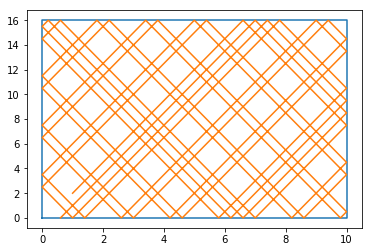

In [61]:
import matplotlib.pyplot as plt


plt.plot(table_x, table_y)
plt.plot(np.array(state_list)[:,0],np.array(state_list)[:,1])

plt.show()


In [13]:
#reflecting code
#give a vector with x and y direction and get the reflection off the wall as the output
angle = np.pi/2
rotat_mat = np.array([np.cos(angle), -np.sin(angle), np.sin(angle), np.cos(angle)]).reshape(2,2)
norm_wall = np.array([0,1])
v = np.array([-.6,8])
v_reflect = v - (2 * np.dot(v ,norm_wall) * norm_wall)
v_reflect

array([-0.6, -8. ])

In [32]:
v_x = .6
v_y = .8
x_o = .3
y_o = 0
r = 5
a = (v_x**2 + v_y**2)
b = 2*(v_x*x_o + v_y*y_o)
c = x_o**2 + y_o**2 - r**2
t_1 = ((-b) + (b**2 - (4*a*c))**(1/2))/2*a
t_2 = ((-b) - (b**2 - (4*a*c))**(1/2))/2*a

t_use = max(t_1,t_2)
x_hit = x_o + v_x * t_use
y_hit = y_o + v_y * t_use
x_hit

3.1885420070474564

In [33]:
v = np.array([.6,.8])
x_norm,y_norm = convert_normal(x_hit,y_hit)
n = np.array([x_norm,y_norm])
v_reflect = v - ((2 * np.dot(v,n))*n)
v_reflect

array([-0.67394668, -0.73877999])

In [37]:
0.66202878**2 + 0.74947842**2

1.0000000075939848

In [47]:
def circle(r,x_start,y_start,v_x,v_y,col):
    col_list = []
    v_xo,v_yo = convert_normal(v_x,v_y)
    v = np.array([v_xo,v_yo])
    x_o = x_start
    y_o = y_start
    r_cir = r 
    col_list.append([x_o,y_o,v[0],v[1]])
    for i in range(col):
        a = (v[0]*v[0]) + (v[1]*v[1])
        b = (2*v[0]*x_o + 2*v[1]*y_o)
        c = (x_o*x_o) + (y_o*y_o) - (r_cir * r_cir)
        t_1 = ((-b) + (b**2 - ((4*a*c))**(1/2)))/2*a
        t_2 = ((-b) - (b**2 - ((4*a*c))**(1/2)))/2*a

        t_use = max(t_1,t_2)
        x_hit = x_o + v[0] * t_use
        y_hit = y_o + v[1] * t_use
        x_norm,y_norm = convert_normal(x_hit,y_hit)
        n = np.array([x_norm,y_norm])
#         v_reflect = v - (2 * np.dot(v ,norm_wall) * norm_wall)
        v_reflect = v - (2 * np.dot(v,n)*n)
        v = v_reflect
        x_o = x_hit
        y_o = y_hit
        col_list.append([x_o,y_o,v[0],v[1]])
    plt.plot(np.array(col_list)[:,0], np.array(col_list)[:,0])
    plt.show()
    return col_list

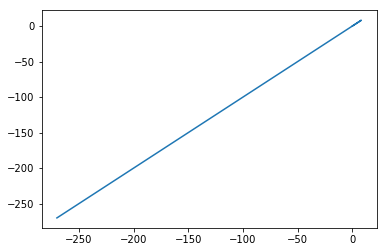

[[0, 4, 0.4472135954999579, 0.8944271909999159],
 [8.116617237230043,
  20.233234474460087,
  -0.2949009142732389,
  -0.9555278388204121],
 [-270.2922394285183,
  -881.8576043209671,
  0.2911923028735898,
  0.956664540341689]]

In [48]:
import numpy as np
import matplotlib.pyplot as plt
c = circle(1,0,4,2,4,2)
c 

In [114]:
def circle_table(rad,phi,theta_o):
    ret_list = []
    theta = theta_o + (2 * phi)
    radians = theta * math.pi/180
    x_new = rad * math.cos(radians)
    y_new = rad * math.sin(radians)
    ret_list.append(x_new)
    ret_list.append(y_new)
    ret_list.append(phi)
    ret_list.append(theta)
    return(ret_list)

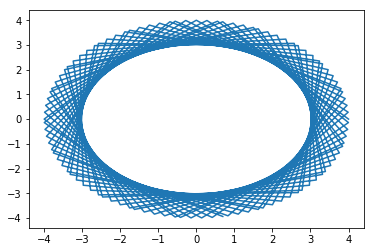

In [171]:
import math
import numpy as np
import matplotlib.pyplot as plt
state_cir = []
num_col = 100
theta_o = 0
phi_o = 41
rad = 4
x_o = 4
y_o = 0
state_cir.append([x_o,y_o,phi_o,theta_o])
theta_start = theta_o
for i in range(num_col):
    hits = circle_table(rad,phi_o,theta_start)
#     print(hits)
    state_cir.append(hits)
    theta_start = hits[3]
plt.plot(np.array(state_cir)[:,0],np.array(state_cir)[:,1])
# plt.savefig("30_degree.png")
plt.show()